<a href="https://colab.research.google.com/github/masa512/PCA/blob/main/decorrelation_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


(2, 500)


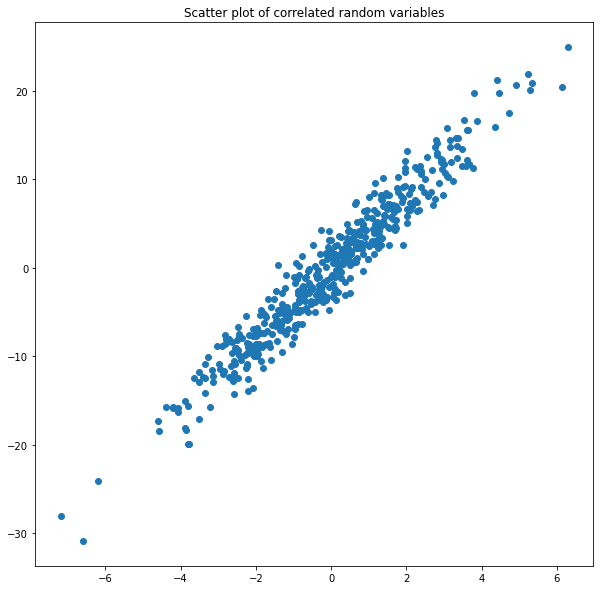

In [57]:
# Generate 2D data
N = 500

# Two uncorrelated Gaussian random variables
r1 = np.random.normal(size=(N,1))
r2 = np.random.normal(size=(N,1)) 

# Generate correlated 2D variables
x = 2*r1 + 0*r2
y = 8*r1 + 2*r2

# Plot the RVs in a 2D scatter plot

fig = plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.title('Scatter plot of correlated random variables')


# Stack data 
D = np.concatenate((x,y),axis=1).T
print(D.shape)

Text(0.5, 1.0, 'Covariance')

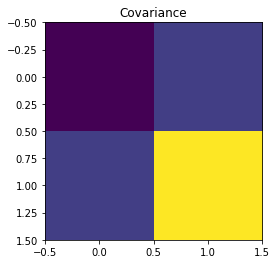

In [58]:
# Define covariance function 

def cov(D):
  N = D.shape[1]
  return (D@D.T)/N

plt.imshow(cov(D))
plt.title('Covariance')

In [59]:
# Eigenvalue decomposition on the covariance matrix

lambd,U = np.linalg.eig(cov(D))
print(lambd)

[ 0.23416228 73.59934959]


In [60]:
# Evaluate decorrelation matrix
W =  np.diag(1/np.sqrt(lambd))@U.T
print(W)

[[-2.01153451  0.47357316]
 [-0.02671213 -0.11346162]]


Text(0.5, 1.0, 'Covariance matrix of decorrelated data')

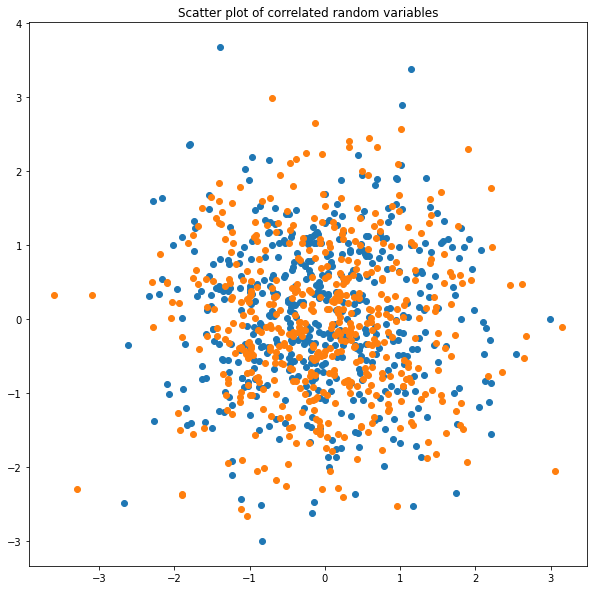

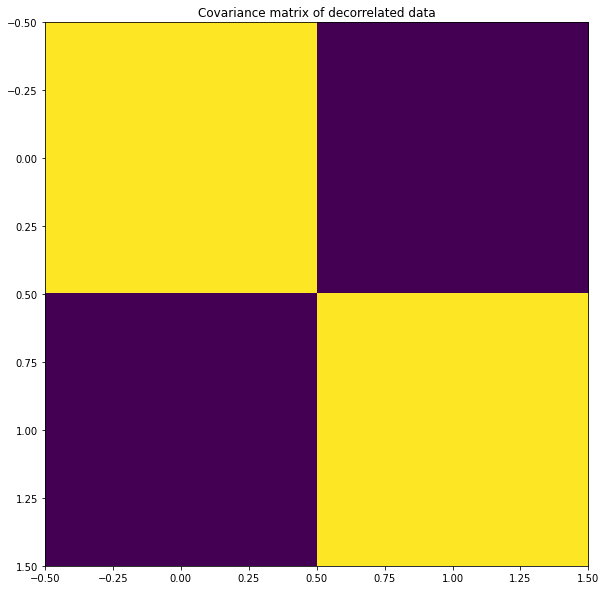

In [64]:
# Decorrelate the data

D_dec = W @ D

fig = plt.figure(figsize=(10,10))
plt.scatter(D_dec[0,:],D_dec[1,:])
plt.scatter(r1,r2)
plt.title('Scatter plot of correlated random variables')

# Evaluate correlation matrix of D_dec for fun
plt.figure(figsize=(10,10))
plt.imshow(cov(D_dec))
plt.title('Covariance matrix of decorrelated data')